**Nome:** Iran Freitas Ribeiro

**Matrícula:** 2021241588

**Disciplina:** TEI - Estatística Aplicada

**Professor:** Celso José Munaro

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import OLS, ccf
plt.style.use("seaborn")

In [3]:
# Leitura dos dados x, y
Z = pd.read_csv("Data_epc10.csv", sep=";", header=None)
Z = Z.values
# separação das amostras
Ztreino_R = Z[:300]
ZCC_treino = Z[300:600]
ZCC_normal = Z[600:1200]
ZCC_falha = Z[1200:]

A Figura $1$ mostra as variáveis $X$ e $Y$, como solicitado para realização das questões.

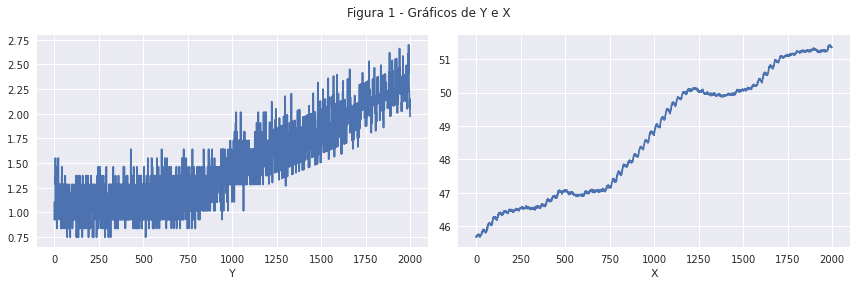

In [4]:
fig, ax = plt.subplots(figsize=(12,4), ncols=2)
ax[0].plot(Z[:, 1])
ax[0].set_xlabel("Y")
ax[1].plot(Z[:, 0])
ax[1].set_xlabel("X")
plt.suptitle("Figura 1 - Gráficos de Y e X")
plt.tight_layout()

# Questão 1

In [5]:
X1 = Ztreino_R[:, 0]
Y1 = Ztreino_R[:, 1]

Primeiramente, obtemos os parâmetros $\beta_0$ e $\beta_1$ usando os dados `Ztreino_R` para treinar o modelo.

In [6]:
# treinamento do modelo
Xr = sm.add_constant(X1) # adiciona coluna com 1s
m1 = OLS(Y1, Xr)
res1 = m1.fit() # ajusta modelo nos dados
b0, b1 = res1.params # betas
b0, b1

(3.8133476967357134, -0.05875932305997963)

Obtemos então $\beta_0 = 3.81$ e $\beta_1 \approx -0.059$.

Após a obtenção dos parâmetros, calculamos os resíduos utilizando os dados `ZCC_treino`.

In [7]:
# verificando o modelo com novos dados (ZCC_treino)
Xtreino = ZCC_treino[:, 0]
Ytreino = ZCC_treino[:, 1]
# obtenção dos resíduos usando os dados de ZCC_treino
y_hat = [(b0 + b1*xi) for xi in Xtreino]

A Figura $2$ plota a reta gerada pelo modelo de regressão sobre o gráfico de dispersão dos dados `ZCC_treino`. Nota-se, no gráfico de dispersão, que vários pontos ($x, y$) em sequência acabam formando várias retas na horizontal, com um leve declive da esquerda para direita. A reta da regressão representa boa parte das retas dos dados em dispersão.

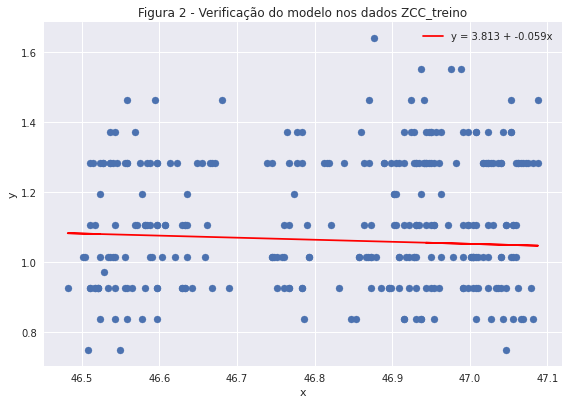

In [8]:
plt.scatter(Xtreino, Ytreino)
plt.plot(Xtreino, y_hat, c='red', label='y = {:.3f} + {:.3f}x'.format(b0, b1))
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.title("Figura 2 - Verificação do modelo nos dados ZCC_treino");

O código a seguir calcula os resíduos do modelo para os dados `ZCC_treino`:

In [9]:
residuos_zc = [yi - yi_hat for yi, yi_hat in zip(Ytreino,y_hat)]
crus_corr = ccf(residuos_zc, residuos_zc, adjusted=False)

A Figura $3$ permite avaliar a normalidade e independência dos resíduos. A Figura $3$(a) mostra o gráfico de autocorrelação dos resíduos. Fica evidente que há uma correlação alta apenas quando o atraso é igual a $0$, logo os resíduos são independentes. A Figura $3$(b) mostra que o histograma dos resíduos aparenta ter uma disitribuição normal com média $\approx 0$. Por fim, a Figura $3$(c) mostra o *normplot* dos resíduos, evidenciando que, de fato, eles são normais.

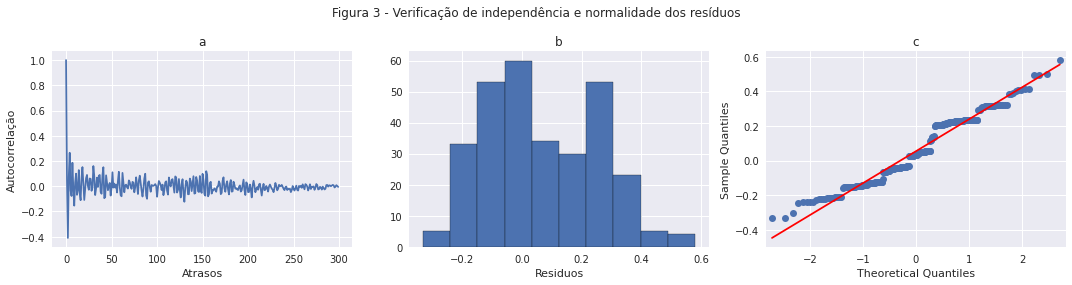

In [10]:
fig, ax = plt.subplots(figsize=(15,4), ncols=3)
ax[0].plot(crus_corr)
ax[1].hist(residuos_zc, edgecolor='black')
sm.qqplot(np.array(residuos_zc), line='s', ax=ax[2])
plt.suptitle("Figura 3 - Verificação de independência e normalidade dos resíduos")
ax[0].set_xlabel("Atrasos")
ax[0].set_ylabel("Autocorrelação")
ax[0].set_title("a")
ax[1].set_xlabel("Residuos")
ax[1].set_title("b")
ax[2].set_title("c")
plt.tight_layout();

# Questão 2

In [11]:
X2c = ZCC_treino[:, 0]
Y2c = ZCC_treino[:, 1]
b0, b1 = res1.params
# previsao de y usando X de ZCC_treino
Y_hat = [b0 + b1*xi for xi in X2c]

In [12]:
media_residuos, std_residuos = np.mean(residuos_zc), np.std(residuos_zc)
media_residuos, std_residuos

(0.05431538676213468, 0.18443677065727432)

In [13]:
# X e Y dos dados normais
X_normal = ZCC_normal[:, 0]
Y_normal = ZCC_normal[:, 1]
# X e Y dos dados com falha
X_falha = ZCC_falha[:, 0]
Y_falha = ZCC_falha[:, 1]

Para verificar a influência do $n$ sobre os resultados de FDR e FAR, varia-se o $n=2, \dots, 60$. A obtenção das cartas de controle e verificação de quais amostras estão dentro do limite esperado são feitas pela função `testes_controle_media()`, definida em anexo no final do PDF. Basicamente a função retorna uma lista com o número de amostras que ultrapassam os limites e uma lista com o número de amostras que não ultrapassam, com base nos dados e parâmetros passados.

Nesse primeiro caso, assume-se que a média e o desvio padrão são conhecidos e foram calculados anteriormente ($\mu=0.054$ e $\sigma=0.18$)

In [33]:
lista_n = np.arange(2,60)
# teste nos dados normais
ultrapassam_normal, n_ultrapassam_normal = testes_controle_media(X_normal, Y_normal, lista_n, 
                                                    mu_conhecido=True, mediac=media_residuos, 
                                                    stdc=std_residuos, params=[b0, b1])
# teste nos dados com falha                                
ultrapassam_falha, n_ultrapassam_falha = testes_controle_media(X_falha, Y_falha, lista_n, 
                                                    mu_conhecido=True, mediac=media_residuos, 
                                                    stdc=std_residuos, params=[b0, b1])

- TP = True Positive: amostras de [1201, 2000] que ultrapassam o limiar\*100/800
- FP = False Positive: amostras de [601,1200] que ultrapassam o limiar\*100/600
- FN = False Negative: amostras de [1201, 2000] que não ultrapassam o limiar\*100/800
- TN = True negative: amostras de [601,1200] que não ultrapassam o limiar\*100/600

In [ ]:
def FDR(TP, FN):
    return TP/(TP+FN)
def FAR(FP, TN):
    return FP/(FP+TN)

In [34]:
# calculos do FDR para cada n
fdrs = [FDR(tp, fn) for tp, fn in zip(ultrapassam_falha, n_ultrapassam_falha)]
fars = [FAR(fp, tn) for fp, tn in zip(ultrapassam_normal, n_ultrapassam_normal)]

A Figura $4$ apresenta os gráficos de $FDR$ e $FAR$ para $n$ variando de $2$ a $60$. Nota-se que os valores de FDR tendem se manter constantes em $1.0$, enquanto os valores de FDA tendem a aumentar à medida que $n$ também aumenta, indo de $0.36$ a $0.9$

In [35]:
fars[0], fars[-1]

(0.36666666666666664, 0.9)

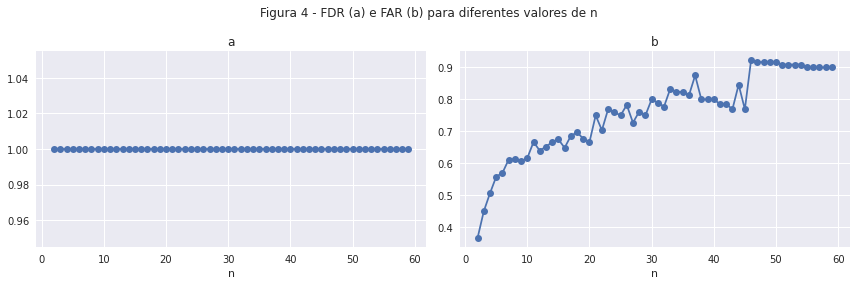

In [17]:
fig, ax = plt.subplots(figsize=(12,4), ncols=2)
ax[0].plot(lista_n, fdrs, marker='o')
ax[1].plot(lista_n, fars, marker='o')
ax[0].set_title("a")
ax[0].set_xlabel("n")
ax[1].set_xlabel("n")
ax[1].set_title("b")
plt.suptitle("Figura 4 - FDR (a) e FAR (b) para diferentes valores de n")
plt.tight_layout();

Desejamos um $n$ que produza um FDR alto e um FDA baixo. Logo, como o FDR é constante, podemos escolher $n=2$, onde o FAR possui o menor valor, assim:

In [36]:
N = 2
ucl2, lcl2 = controle(media_residuos, std_residuos, N)
amostras_xnormal_c, amostras_ynormal_c = get_amostras(X_normal, Y_normal, N)
medias_normais_c, _ = calc_media_desvio_residuos(amostras_xnormal_c, amostras_ynormal_c, b0, b1, N)
amostras_xfalha_c, amostras_yfalha_c = get_amostras(X_falha, Y_falha, N)
medias_falha_c, _ = calc_media_desvio_residuos(amostras_xfalha_c, amostras_yfalha_c, b0, b1, N)

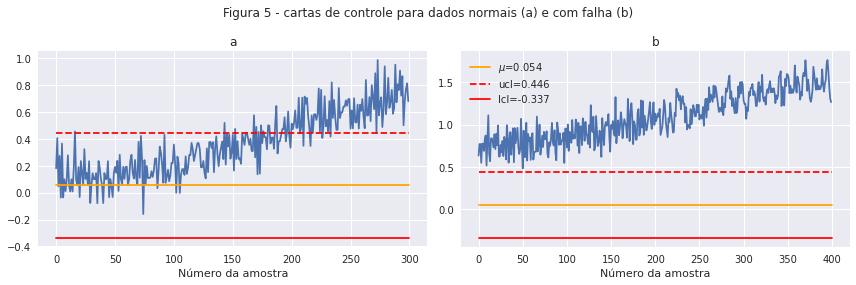

In [37]:
fig, ax = plt.subplots(figsize=(12,4), ncols=2)
x = np.arange(len(medias_normais_c))
ax[0].plot(x, medias_normais_c)
ax[0].plot([0, len(x)], [media_residuos, media_residuos], c='orange', label=r'$\mu$={:.3f}'.format(media_residuos))
ax[0].plot([0, len(x)], [ucl2, ucl2], ls='--', c='red', label='ucl={:.3f}'.format(ucl2))
ax[0].plot([0, len(x)], [lcl2, lcl2], c='red', label='lcl={:.3f}'.format(lcl2))
ax[0].set_title("a")
ax[0].set_xlabel("Número da amostra")

x = np.arange(len(medias_falha_c))
ax[1].plot(x, medias_falha_c)
ax[1].plot([0, len(x)], [media_residuos, media_residuos], c='orange', label=r'$\mu$={:.3f}'.format(media_residuos))
ax[1].plot([0, len(x)], [ucl2, ucl2], ls='--', c='red', label='ucl={:.3f}'.format(ucl2))
ax[1].plot([0, len(x)], [lcl2, lcl2], c='red', label='lcl={:.3f}'.format(lcl2))
ax[1].set_title("b")
ax[1].set_xlabel("Número da amostra")
plt.suptitle("Figura 5 - cartas de controle para dados normais (a) e com falha (b)")
plt.tight_layout()
plt.legend();

A Figura $5$ mostra que as cartas de controle conseguem identificar bem quando o processo está dentro dos limites de controle. Para os dados normais, por exemplo, quanto mais próxima dos dados de falha estão as amostras maior o número de médias que de acabam ultrapassando os limite definidos. Da mesma forma, a carta de controle não classifica nenhum dos dados com falha como dentro dos limites do controle.

# Questão 3

In [20]:
# separo as amostras de 10 em 10
amostras_xnormal_3, amostras_ynormal_3 = get_amostras(X_normal, Y_normal, 10)
medias_normais3, desvios_normais3 = calc_media_desvio_residuos(amostras_xnormal_3, amostras_ynormal_3, b0, b1, 10)
medias_normais3 = np.array(medias_normais3)
desvios_normais3 = np.array(desvios_normais3)

amostras_xfalha_3, amostras_yfalha_3 = get_amostras(X_falha, Y_falha, 10)
medias_falha3, desvios_falhas3 = calc_media_desvio_residuos(amostras_xfalha_3, amostras_yfalha_3, b0, b1, 10)
medias_falha3 = np.array(medias_falha3)
desvios_falhas3 = np.array(desvios_falhas3)

In [21]:
ms = [5, 10, 20]
# estimo as médais com base nos m dados
medias_estimadas_normal = [np.mean(medias_normais3[:m]) for m in ms]
ranges_amostrais = [medias_normais3[:m].max() - medias_normais3[:m].min() for m in ms]
R_media_normal = np.mean(ranges_amostrais)
R_media_normal

0.14255238855481467

Podemos estimar o desvio padrão usando a equação $\hat{\sigma} = \frac{\bar{R}}{d_2}$, onde $\bar{R}$ é o range da amostra.  Pela Tabela $X$ no livro de referência, quando $n=10$, $d_2 = 3.078$, assim, podemos estimar o desvio padrão:

In [38]:
d2 = 3.078
desvio_normal = R_media_normal/d2
desvio_normal

0.046313316619497946

Com a média e desvio padrão estimados podemos calcular os valores para os FDR e FAR para considerando diferentes valores de $m$:

In [40]:
lista_n = [10]
lista_ultrapassam_normal = []
lista_ultrapassam_falha = []
lista_nultrapassam_normal = []
lista_nultrapassam_falha = []
for m_n in medias_estimadas_normal:
    # ultrapassam e não ultrapassam os dados normais
    u_n, n_u_n = testes_controle_media(X_normal, Y_normal, lista_n, mu_conhecido=False, 
                                        mediac=m_n, stdc=d2, params=[b0, b1], R_bar=R_media_normal)
    # ultrapassam e não ultrapassam os dados com falha
    u_f, n_u_f = testes_controle_media(X_falha, Y_falha, lista_n, mu_conhecido=False, 
                                        mediac=m_n, stdc=d2, params=[b0, b1], R_bar=R_media_normal)
    lista_ultrapassam_normal.append(u_n[0])
    lista_nultrapassam_normal.append(n_u_n[0])
    lista_ultrapassam_falha.append(u_f[0])
    lista_nultrapassam_falha.append(n_u_f[0])

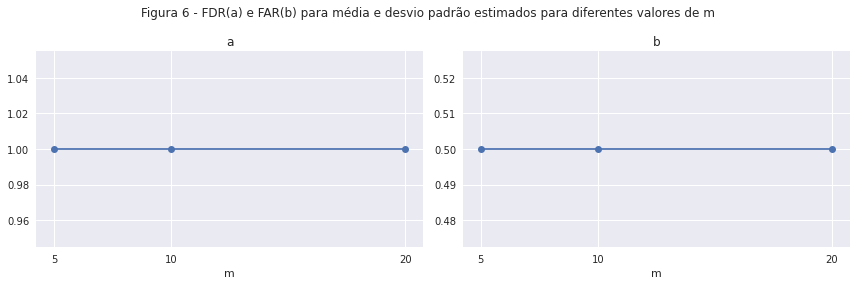

In [41]:
fdrs = [FDR(tp, fn) for tp, fn in zip(lista_ultrapassam_falha, lista_nultrapassam_falha)]
fars = [FAR(fp, tn) for fp, tn in zip(lista_ultrapassam_normal, lista_ultrapassam_normal)]

fig, ax = plt.subplots(figsize=(12,4), ncols=2)
ax[0].plot(ms, fdrs, marker='o')
ax[1].plot(ms, fars, marker='o')
ax[0].set_xlabel("m")
ax[0].set_xticks([5, 10, 20])
ax[0].set_title("a")
ax[1].set_xlabel("m")
ax[1].set_title("b")
plt.suptitle("Figura 6 - FDR(a) e FAR(b) para média e desvio padrão estimados para diferentes valores de m")
plt.xticks(ms)
plt.tight_layout();

A Figura $6$ mostra o FDR e FAR  para diferentes valores de $m$, considerando a média desconhecida. Nota-se que tanto o FDR quanto o FAR não variam em função de $m$, correspondendo à 1.0 e 0.5, respectivamente. Uma justificativa para isso é que as médias dos controles para os diferentes $m$ utilizados são muito próximas, $[0.14, 0.11, 0.14]$

In [43]:
medias_estimadas_normal

[0.14254657694892073, 0.11629559513578344, 0.14204118707339938]

In [44]:
ucl2, lcl2 = c_media_desvio_desc(medias_estimadas_normal[0], d2, 10, R_media_normal)

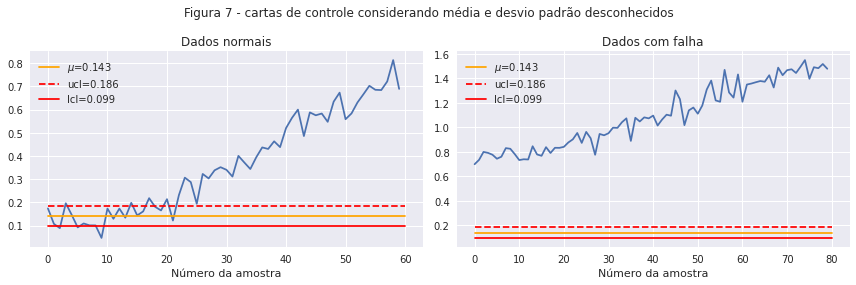

In [45]:
fig, ax = plt.subplots(figsize=(12,4), ncols=2)
x = np.arange(len(medias_normais3))
mu = medias_estimadas_normal[0]
ax[0].plot(x, medias_normais3)
ax[0].plot([0, len(x)], [mu, mu], c='orange', label=r'$\mu$={:.3f}'.format(mu))
ax[0].plot([0, len(x)], [ucl2, ucl2], ls='--', c='red', label='ucl={:.3f}'.format(ucl2))
ax[0].plot([0, len(x)], [lcl2, lcl2], c='red', label='lcl={:.3f}'.format(lcl2))
ax[0].legend()
ax[0].set_xlabel("Número da amostra")
ax[0].set_title("Dados normais")

x = np.arange(len(medias_falha3))
ax[1].plot(x, medias_falha3)
ax[1].plot([0, len(x)], [mu, mu], c='orange', label=r'$\mu$={:.3f}'.format(mu))
ax[1].plot([0, len(x)], [ucl2, ucl2], ls='--', c='red', label='ucl={:.3f}'.format(ucl2))
ax[1].plot([0, len(x)], [lcl2, lcl2], c='red', label='lcl={:.3f}'.format(lcl2))
ax[1].set_title("Dados com falha")
ax[1].set_xlabel("Número da amostra")
ax[1].legend()
plt.suptitle("Figura 7 - cartas de controle considerando média e desvio padrão desconhecidos")
plt.tight_layout()
plt.legend();

A Figura $7$ apresenta as cartas de controle para os dados normais (à esquerda) e dados com falha (à direita). Nota-se pela figura, que quando estima-se a média e desvio padrão, boa parte das amostras normais acaba ultrapassando os limites de controle, quando não deveriam. Por outro lado, nota-se também que os dados com falha ficam bem mais distantes dos limites do controle. Nos resultados anteriores as amostras com falha ficavam bem próximas de ficarem dentro dos limites (quando não deveriam).

# Questão 4

In [28]:
medias_desvios = [np.mean(desvios_normais3[:m]) for m in ms]

In [46]:
lista_n = [10]
lista_ultrapassam_normal = []
lista_ultrapassam_falha = []
lista_nultrapassam_normal = []
lista_nultrapassam_falha = []
for sbar_i in medias_desvios:
    u_n, n_u_n = testes_controle_desvio(X_normal, Y_normal, lista_n, sbar=sbar_i, params=[b0, b1])
    u_f, n_u_f = testes_controle_desvio(X_falha, Y_falha, lista_n, sbar=sbar_i, params=[b0, b1])
    lista_ultrapassam_normal.append(u_n[0])
    lista_nultrapassam_normal.append(n_u_n[0])
    lista_ultrapassam_falha.append(u_f[0])
    lista_nultrapassam_falha.append(n_u_f[0])

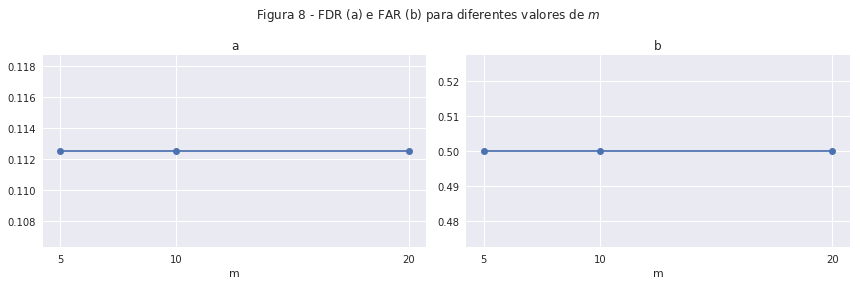

In [47]:
fdrs = [FDR(tp, fn) for tp, fn in zip(lista_ultrapassam_falha, lista_nultrapassam_falha)]
fars = [FAR(fp, tn) for fp, tn in zip(lista_ultrapassam_normal, lista_ultrapassam_normal)]

fig, ax = plt.subplots(figsize=(12,4), ncols=2)
ax[0].plot(ms, fdrs, marker='o')
ax[0].set_title("a")
ax[1].plot(ms, fars, marker='o')
ax[0].set_xlabel("m")
ax[0].set_xticks([5, 10, 20])
ax[1].set_xlabel("m")
ax[1].set_title("b")
plt.suptitle("Figura 8 - FDR (a) e FAR (b) para diferentes valores de $m$")
plt.xticks(ms)
plt.tight_layout();

In [50]:
fdrs[0],fars[0]

(0.1125, 0.5)

A Figura $8$ mostra os valores de FDR (a) e FAR (b) para as cartas de controle do desvio padrão onde varia-se o parâmetro $m$. Assim como no item $3$, os dois resultados se mantém constantes, independente do $m$ utilizado. Assim, o FDR se mantém em $0.11\%$ e o FAR em $50\%$. Nesse caso, percebe-se que, com o desvio padrão, a carta de controle classifica corretamente uma porcentagem menor dos dados normais. Em outras palavras, amostras que não deveriam ultrapassar o limite acabam ultrapassando. Além disso, assim como no no item $3$, a carta de controle acaba classificando incorretamente $50\%$ dos falsos positivos.

# Anexo (Funções construídas)

In [1]:
def controle(media, desvio, n, s=3):
    """
    Calcula o limite superior e inferior de uma carta de controle para a média conhecida
    """
    desvio_a = desvio/np.sqrt(n)
    ucl = media + s*desvio_a
    lcl = media - s*desvio_a
    return ucl, lcl

def c_media_desvio_desc(media_bar, d2, n, R_bar):
    """
    Limites de controle quando a media e desvio não são conhecidos
    """
    ucl = media_bar + 3/(d2*np.sqrt(n)) * R_bar
    lcl = media_bar - 3/(d2*np.sqrt(n)) * R_bar
    return ucl, lcl

def get_amostras(X, Y, n):
    """
    Seleciona amostras de tamanho n de X e Y
    """
    amostras_X = []
    amostras_Y = []
    i = 0
    while(i<len(X)):
        amostras_X.append(X[i:i+n])
        amostras_Y.append(Y[i:i+n])
        i = i+n
    return amostras_X, amostras_Y
    
def calc_media_desvio_residuos(amostrasX, amostrasY, b0, b1, n):
    """
    Calcula as médias e desvios dos resíduos
    """
    medias_residuos = []
    desvios_residuos= []
    for a_x, a_y in zip(amostrasX, amostrasY):
        if len(a_x)==n: # só executa caso a amostra tenha tamanho n
            y_hat_amostra = [b0 + b1*xi for xi in a_x]
            res_amostra = np.array(a_y) - np.array(y_hat_amostra)
            medias_residuos.append(res_amostra.mean())
            desvios_residuos.append(res_amostra.std())
    return medias_residuos, desvios_residuos

def testes_controle_media(X, Y, ns=[], mu_conhecido=False, mediac=0, stdc=1, params=[], R_bar=None):
    """
    Verifica as médias dentro dos limites para diferentes valores de n
    """
    b0, b1 = params
    ultrapassam = []
    nao_ultrapassam = []
    for i, n in enumerate(ns):
        amostras_X, amostras_Y = get_amostras(X, Y, n)
        if (mu_conhecido):
            ucl2, lcl2 = controle(mediac, stdc, n)
        else:
            ucl2, lcl2 = c_media_desvio_desc(mediac, stdc, n, R_bar)        
        medias_residuos = []
        medias_residuos, _ = calc_media_desvio_residuos(amostras_X, amostras_Y, b0, b1, n)
        medias_residuos = np.array(medias_residuos)
        dentro_intervalo = [1 for m in medias_residuos if (ucl2>m) and (m>lcl2)]    
        soma_dentro = sum(dentro_intervalo)
        nao_ultrapassam.append(soma_dentro)
        ultrapassam.append(len(medias_residuos) - soma_dentro)
    return ultrapassam, nao_ultrapassam

def FDR(TP, FN):
    return TP/(TP+FN)
def FAR(FP, TN):
    return FP/(FP+TN)

def controle_desvio(sbar, c4):
    """
    Calcula limites de controle para o desvio padrão
    """
    UCL = sbar + 3 * sbar/c4 * np.sqrt(1 - c4**2)
    LCL = sbar - 3 * sbar/c4 * np.sqrt(1 - c4**2)
    return UCL, LCL

def testes_controle_desvio(X, Y, ns=[], sbar=0, c4=0.99, params=[]):
    b0, b1 = params
    ultrapassam = []
    nao_ultrapassam = []
    for i, n in enumerate(ns):
        amostras_X, amostras_Y = get_amostras(X, Y, n)
        ucl2, lcl2 = controle_desvio(sbar, c4)
        _, desvios_residuos = calc_media_desvio_residuos(amostras_X, amostras_Y, b0, b1, n)
        dentro_intervalo = [1 for s in desvios_residuos if (ucl2>s) and (s>lcl2)]    
        soma_dentro = sum(dentro_intervalo)
        nao_ultrapassam.append(soma_dentro)
        ultrapassam.append(len(desvios_residuos) - soma_dentro)
    return ultrapassam, nao_ultrapassam